#### In this notebook we clustered the reviews data based on price and sentiments.
#### Sentiments were categorised as postive or negative using SentimentAnalyser from nltk

In [1]:
import os
import sys
import pandas as pd

In [2]:
review_meta = pd.read_csv("../../data/review_metadata.csv")

/tmp/ipykernel_152455/145584005.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  review_meta = pd.read_csv("../../data/review_metadata.csv")


In [9]:
review_meta.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,...,also_view,main_cat,similar_item,date,price,details,software_category,Licensing_Fee,Implemention_cost,Maintenance_cost
0,0,5.0,False,"07 23, 2008",A8IOST6U6WH9B,0615179088,C. Radey,Human Japanese is a truly superb introduction ...,Human Japanese,12,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
1,1,5.0,False,"06 4, 2008",A1MUV9F35OROS5,0615179088,D. Abel,I got Human Japanese as a demo from its websit...,Best Japanese Program Available,11,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
2,2,4.0,False,"04 8, 2008",A27PAMABWVQ892,0615179088,piepiepie75,My first experience with Human Japanese was th...,Better than the Human Japanese 1...but not muc...,99,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
3,3,5.0,False,"03 26, 2008",A3HWWVK0L3JEKF,0615179088,K. Grier,This is the first language software that I hav...,Great Product,4,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
4,4,5.0,False,"02 20, 2008",A3NO2V2JU4Y8UY,0615179088,H. Granat,Human japanese is the best pc program for lear...,Love it!,2,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994


In [19]:
len(review_meta)

145863

In [23]:
review_meta.columns.tolist()

['Unnamed: 0',
 'overall',
 'verified',
 'reviewTime',
 'reviewerID',
 'asin',
 'reviewerName',
 'reviewText',
 'summary',
 'vote',
 'category',
 'tech1',
 'description',
 'fit',
 'title',
 'also_buy',
 'tech2',
 'brand',
 'feature',
 'rank',
 'also_view',
 'main_cat',
 'similar_item',
 'date',
 'price',
 'details',
 'software_category',
 'Licensing_Fee',
 'Implemention_cost',
 'Maintenance_cost']

### Basic Analysis
<br>Idea: We use cluster data on sentiment and total price, using kmeans clustering.</br>
<br>Sentiments are generated from review data.</br>

In [3]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/sc0001/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/sc0001/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/sc0001/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/sc0001/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/sc0001/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |

True

In [4]:
cols = ['verified','reviewText', 'overall', 'price', 'rank', 'Licensing_Fee', 'Implemention_cost', 'Maintenance_cost']
data = review_meta[cols]


In [5]:
def preprocess_text(text):
    # Tokenize the text
    text = str(text)
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text
data['reviewText'] = data['reviewText'].apply(preprocess_text)
data.head()

/tmp/ipykernel_152455/699602883.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText'] = data['reviewText'].apply(preprocess_text)


,verified,reviewText,overall,price,rank,Licensing_Fee,Implemention_cost,Maintenance_cost
0,False,human japanese truly superb introduction outsi...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994
1,False,got human japanese demo website . within week ...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994
2,False,first experience human japanese first version ...,4.0,39.94,"3,689 in Software (",0.008,19.97,3.994
3,False,first language software purchased love ! way i...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994
4,False,human japanese best pc program learning japane...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994


In [6]:
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    text = str(text)
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

data['sentiment'] = data['reviewText'].apply(get_sentiment)

/tmp/ipykernel_152455/363939122.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['reviewText'].apply(get_sentiment)


In [10]:
data.head()

,verified,reviewText,overall,price,rank,Licensing_Fee,Implemention_cost,Maintenance_cost,sentiment
0,False,human japanese truly superb introduction outsi...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1
1,False,got human japanese demo website . within week ...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1
2,False,first experience human japanese first version ...,4.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1
3,False,first language software purchased love ! way i...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1
4,False,human japanese best pc program learning japane...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1


### Clustering on Price and Sentiment

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
features = data[['price','sentiment']]
scaled_features = scaler.fit_transform(features)

In [9]:
kmeans = KMeans(n_clusters=4)

In [10]:
kmeans.fit(scaled_features)

/home/sc0001/Documents/SoftRec/sofRec/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
kmeans_silhoutte = silhouette_score(scaled_features,kmeans.labels_).round(2)

In [17]:
kmeans_silhoutte

0.74

In [18]:
data['kmeans_clustering'] = kmeans.labels_

/tmp/ipykernel_152455/1312427123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kmeans_clustering'] = kmeans.labels_


In [19]:
data.kmeans_clustering.value_counts()

kmeans_clustering
0    102149
2     22296
1     21355
3        63
Name: count, dtype: int64

In [20]:
data.sentiment.value_counts()

sentiment
1    124421
0     21442
Name: count, dtype: int64

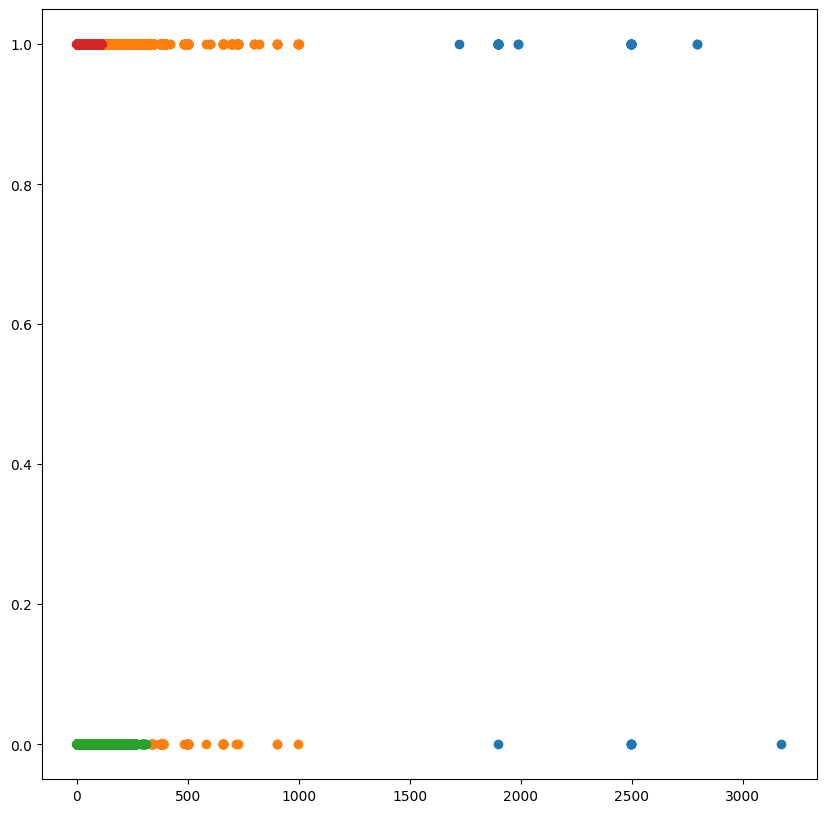

In [21]:
from matplotlib import pyplot as plt
data_1 = data[data.kmeans_clustering == 3]
data_2 = data[data.kmeans_clustering == 2]
data_3 = data[data.kmeans_clustering == 1]
data_4 = data[data.kmeans_clustering == 0]
plt.figure(figsize=(10,10))
plt.scatter(data_1['price'],data_1['sentiment'])
plt.scatter(data_2['price'],data_2['sentiment'])
plt.scatter(data_3['price'],data_3['sentiment'])
plt.scatter(data_4['price'],data_4['sentiment'])
plt.show()

### Predict Recommendation without sentiment and Kmeans_clustering

In [22]:
data.head()

,verified,reviewText,overall,price,rank,Licensing_Fee,Implemention_cost,Maintenance_cost,sentiment,kmeans_clustering
0,False,human japanese truly superb introduction outsi...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1,0
1,False,got human japanese demo website . within week ...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1,0
2,False,first experience human japanese first version ...,4.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1,0
3,False,first language software purchased love ! way i...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1,0
4,False,human japanese best pc program learning japane...,5.0,39.94,"3,689 in Software (",0.008,19.97,3.994,1,0


In [23]:
data.columns.tolist()

['verified',
 'reviewText',
 'overall',
 'price',
 'rank',
 'Licensing_Fee',
 'Implemention_cost',
 'Maintenance_cost',
 'sentiment',
 'kmeans_clustering']

### Classification with randomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import sklearn.metrics as skm
import seaborn as sns

In [28]:
data[['overall','price','rank','Licensing_Fee','Implemention_cost','Maintenance_cost']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145863 entries, 0 to 145862
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   overall            145863 non-null  float64
 1   price              145863 non-null  float64
 2   rank               145863 non-null  object 
 3   Licensing_Fee      145863 non-null  float64
 4   Implemention_cost  145863 non-null  float64
 5   Maintenance_cost   145863 non-null  float64
dtypes: float64(5), object(1)
memory usage: 6.7+ MB


In [30]:
X_train, X_val, y_train, y_val = train_test_split(data[['overall','price','Licensing_Fee','Implemention_cost','Maintenance_cost']], data['kmeans_clustering'], test_size=0.2, random_state=42)
datasets = [
    [X_train, y_train],
    [X_val, y_val]
]

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
for split_name, dataset in zip(['train', 'validation'], datasets):
    X_i, y_i = dataset
    y_pred = rf_clf.predict(X_i)
    print(f'\nSplit: {split_name}')
    print(skm.classification_report(y_i, y_pred))


Split: train
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     81692
           1       0.72      0.06      0.11     17130
           2       0.86      1.00      0.92     17820
           3       1.00      1.00      1.00        48

    accuracy                           0.86    116690
   macro avg       0.86      0.76      0.74    116690
weighted avg       0.84      0.86      0.80    116690


Split: validation
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     20457
           1       0.41      0.04      0.07      4225
           2       0.85      1.00      0.92      4476
           3       1.00      1.00      1.00        15

    accuracy                           0.85     29173
   macro avg       0.78      0.76      0.73     29173
weighted avg       0.79      0.85      0.80     29173



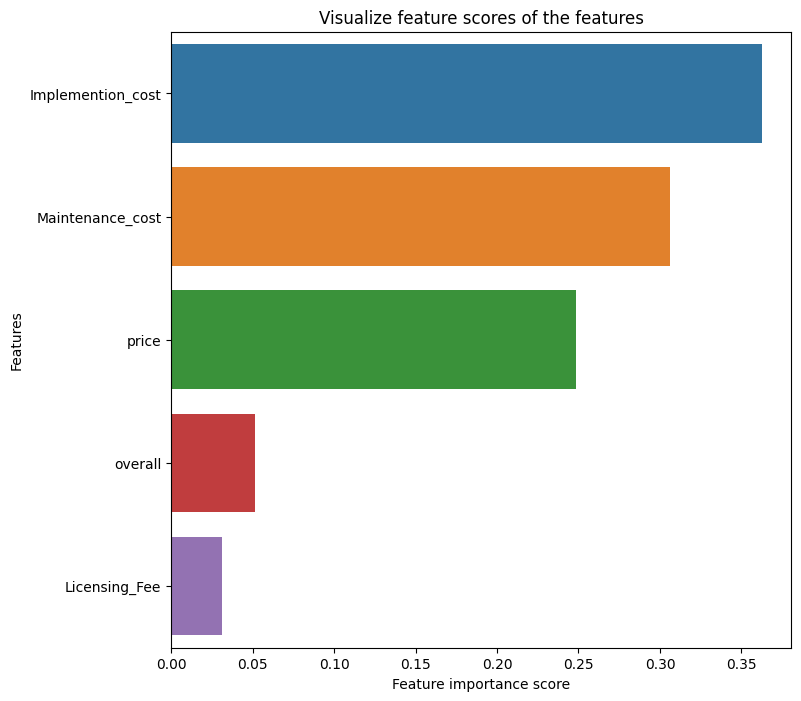

In [42]:
feature_scores = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()